# Jupyter notebook for EDA

## Introduction to Data Preprocessing
This notebook focuses on the initial steps of data preprocessing for sentiment analysis based on airline tweets. The preprocessing steps will include handling missing values, normalizing data formats, feature selection, and splitting the data into training and test sets.



## Importing Necessary Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset
Let's start by loading the dataset to understand its structure, which will guide our preprocessing steps.

In [2]:
# Load the dataset
tweets_df = pd.read_csv('../data/Tweets.csv')

# Display the first few rows to understand its structure
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Sentiment Distribution
To show the distribution of sentiments across the tweets, providing insight into the overall sentiment bias in the dataset.

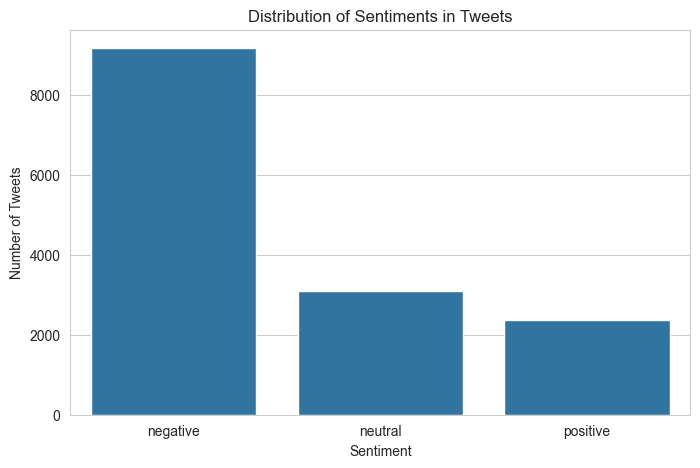

In [3]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='airline_sentiment', data=tweets_df, order=['negative', 'neutral', 'positive'])
plt.title('Distribution of Sentiments in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


## Preprocessing Steps
Given the structure of the dataset, the preprocessing will include:

1. Handling missing values.
2. Dropping unnecessary columns.
3. Normalizing the `tweet_created` timestamp.
4. Feature selection for sentiment analysis.
5. Splitting the dataset into training and test sets.

In [4]:
# Fill missing 'negativereason_confidence' values with 0
tweets_df['negativereason_confidence'] = tweets_df['negativereason_confidence'].fillna(0)

# Drop columns that are not essential for our analysis
tweets_df.drop(columns=['tweet_coord', 'tweet_location', 'user_timezone', 'airline_sentiment_gold', 'negativereason_gold'], inplace=True)


In [5]:
# Normalize 'tweet_created' to datetime format
tweets_df['tweet_created'] = pd.to_datetime(tweets_df['tweet_created'])


## Tweet Length Distribution by Sentiment
To analyze if there's a noticeable difference in the length of tweets among different sentiment categories, which might be useful for feature engineering.

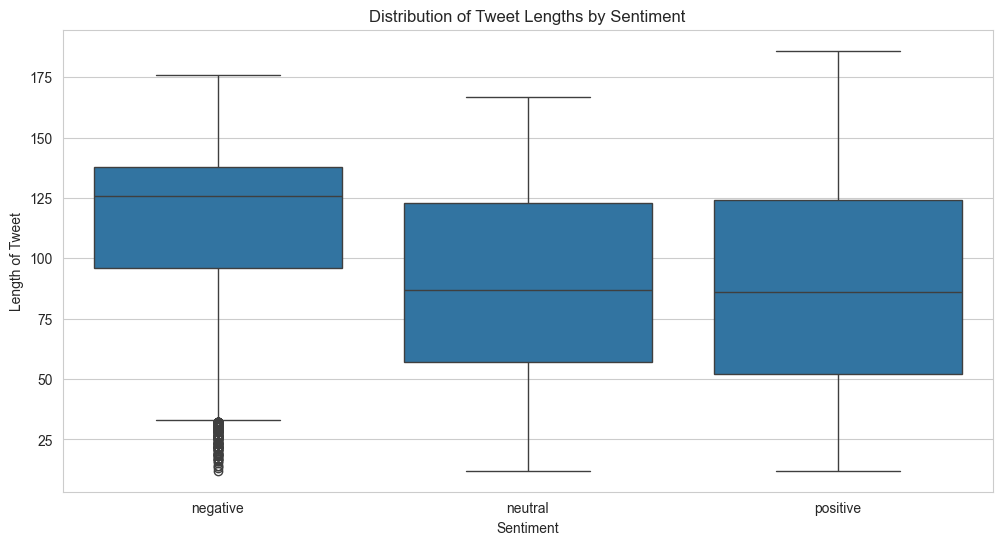

In [6]:
# Insert after basic data cleaning
tweets_df['tweet_length'] = tweets_df['text'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(x='airline_sentiment', y='tweet_length', data=tweets_df, order=['negative', 'neutral', 'positive'])
plt.title('Distribution of Tweet Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Length of Tweet')
plt.show()

## Feature Selection
For sentiment analysis, we will focus on the `text` of the tweets as our feature and `airline_sentiment` as the target.

In [7]:
# Selecting features and target
X = tweets_df['text']
y = tweets_df['airline_sentiment']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Summary of Preprocessing
Let's summarize the preprocessing steps and the shape of our dataset post-preprocessing.

In [8]:
# Summarize the preprocessing steps
preprocessing_summary = {
    "Initial Data Shape": tweets_df.shape,
    "Training Set Size": X_train.shape[0],
    "Test Set Size": X_test.shape[0]
}

preprocessing_summary

{'Initial Data Shape': (14640, 11),
 'Training Set Size': 11712,
 'Test Set Size': 2928}

## Pickle the preprocessed dataset

In [9]:
# Preparing the preprocessed data for pickling
preprocessed_data = {
    "X_train": X_train,
    "X_test": X_test,
    "y_train": y_train,
    "y_test": y_test
}

# Specifying the path for the pickle file
pickle_file_path = '../data/preprocessed_tweets.pkl'

# Pickling the preprocessed data
with open(pickle_file_path, 'wb') as file:
    pickle.dump(preprocessed_data, file)

# Save as csv file
tweets_df.to_csv('../data/preprocessed_tweets.csv', index=False)